In [1]:
# This cell is removed with the tag: "remove-input"
# As such, it will not be shown in documentation

import warnings
warnings.filterwarnings('ignore')

(Tutorial_Iterator)=
# Iterator

*Iterating over topological and structural attributes of a molecular system*

MolSysMT provides a convenient tool to iterate over topological and structural attributes of a molecular system. This tool — the class {class}`molsysmt.basic.Iterator` — supports standard control arguments like `start`, `stop`, `step`, and `chunk`, regardless of the attribute type.

:::{hint}
Visit the section [User guide > Introduction > Molecular System > Attributes](../../intro/molecular_systems/attributes.ipynb) in case you are not familiar with the concept of "attribute" in MolSysMT.
:::

Let's start showing the use of the iterator over topological attributes.

## Iterations over topological attributes

Suppose we want to iterate over topological attributes such as `atom_name` or `group_index`.
The class {class}`molsysmt.basic.Iterator` is designed for this purpose.

```{admonition} API documentation
Follow this link for a detailed description of the input arguments, raised errors, and returned objects of this function:{class}`molsysmt.basic.Iterator`.
```

Have a look to the following code:

In [2]:
import molsysmt as msm

In [3]:
molsys = msm.systems['chicken villin HP35']['1vii.bcif.gz']

In [4]:
iterator = msm.Iterator(molsys, selection='atom_name=="CA" and group_index<10',
                        atom_index=True, atom_name=True, group_index=True, group_name=True)

:::{tip}
All objects defined in the {ref}`molsysmt.basic <API basic>` module can be invoked also from the main level of the library. Hence, {class}`molsysmt.Iterator` is the same class as {class}`molsysmt.basic.Iterator`.
:::

In [5]:
for atom_index, atom_name, group_index, group_name in iterator:
    print(atom_index, atom_name, group_index, group_name)

0 N 0 MET
1 CA 0 MET
2 C 0 MET
3 O 0 MET
4 CB 0 MET
5 CG 0 MET
6 SD 0 MET
7 CE 0 MET
8 H1 0 MET
9 H2 0 MET


The class {class}`molsysmt.basic.Iterator` allows us to work with a loop running over a selection of atoms. The set of attributes we want to extract are introduced together with the rest of instantation arguments in a similar way they are indicated in {func}`molsysmt.basic.get`. But, is the iterator only running over atoms? Not at all. The `element` argument can be set to other leves such as `group`, `component`, `chain`, `molecule` or `entity`. Check this next case:

In [6]:
iterator = msm.Iterator(molsys, element='group', selection='molecule_type=="peptide"',
                        group_index=True, group_name=True)

In [7]:
for group_index, group_name in iterator:
    print(group_index, group_name)

0 MET
1 LEU
2 SER
3 ASP
4 GLU
5 ASP
6 PHE
7 LYS
8 ALA
9 VAL
10 PHE
11 GLY
12 MET
13 THR
14 ARG
15 SER
16 ALA
17 PHE
18 ALA
19 ASN
20 LEU
21 PRO
22 LEU
23 TRP
24 LYS
25 GLN
26 GLN
27 ASN
28 LEU
29 LYS
30 LYS
31 GLU
32 LYS
33 GLY
34 LEU
35 PHE


For more advanced iteration control, you can use the arguments `start`, `stop`, `step` and `chunk`.

In [8]:
iterator = msm.Iterator(molsys, element='atom', start=10, stop=40, step=2, chunk=5,
                        atom_index=True, atom_name=True)

In [9]:
for atom_indices, atom_names in iterator:
    print(atom_indices, atom_names)

[10, 12, 14, 16, 18] ['H3', 'HB2', 'HG2', 'HE1', 'HE3']
[20, 22, 24, 26, 28] ['CA', 'O', 'CG', 'CD2', 'HA']
[30, 32, 34, 36, 38] ['HB3', 'HD11', 'HD13', 'HD22', 'N']


:::{tip}
If you want to extract values of topological or structural attributes from a molecular system, {func}`molsysmt.basic.Iterator` is not the only way you can do it. Have a look to the function {func}`molsysmt.basic.get` and its {ref}`User guide > Tools > Basic > Get <Tutorial_Get>`.
:::

## Iterations over structural attributes

In this section, let's suppose we have a molecular system with different structures: a molecular dynamics trajectory file, for instance.
And let's see how the class {class}`molsysmt.basic.Iterator` can be used to iterate over structural attributes such as `coordinates`, `box` or `time`. 

```{admonition} API documentation
Follow this link for a detailed description of the input arguments, raised errors, and returned objects of this function:{class}`molsysmt.basic.Iterator`.
```

Here we have an example:

In [10]:
molsys = msm.systems['pentalanine']['traj_pentalanine.h5']

In [11]:
iterator = msm.Iterator(molsys, time=True, temperature=True)

```{admonition} API documentation
Follow this link for a detailed description of the input arguments, raised errors, and returned objects of this function:{class}`molsysmt.basic.Iterator`.
```

:::{tip}
All methods defined in the {ref}`molsysmt.basic <API basic>` module can be invoked also from the main level of the library. Hence, {func}`molsysmt.Iterator` is the same method as {func}`molsysmt.basic.Iterator`.
:::

In [12]:
times = []
temperatures = []

for time, temperature in iterator:
    times.append(time)
    temperatures.append(temperature)

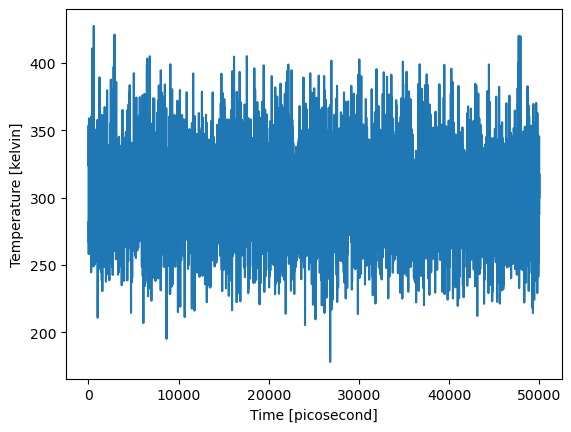

In [13]:
import matplotlib.pyplot as plt
import pyunitwizard as puw
import numpy as np

times = puw.utils.sequences.concatenate(times)
temperatures = puw.utils.sequences.concatenate(temperatures)

plt.plot(times, temperatures)
plt.xlabel(f'Time [{puw.get_unit(times)}]')
plt.ylabel(f'Temperature [{puw.get_unit(temperatures)}]')
plt.show()

The iterator includes some useful input arguments such as `selection` or `structure_indices`:

In [14]:
iterator = msm.Iterator(molsys, selection='group_index==3 and atom_name=="CA"',
                        structure_indices=[100, 110, 120], time=True, coordinates=True)

In [15]:
for time, coordinates in iterator:
    print(time, coordinates)

1010.0 picosecond [[[0.9690295457839966 1.146891474723816 -0.1522401124238968]]] nanometer
1110.0 picosecond [[[1.023858666419983 1.377505898475647 0.03329920768737793]]] nanometer
1210.0 picosecond [[[0.9038813710212708 1.1570117473602295 0.03575613722205162]]] nanometer


And four iteration control arguments: `start`, `stop`, `step` and `chunk`.

In [16]:
iterator = msm.Iterator(molsys, start=500, stop=510, step=2, structure_id=True)

In [17]:
for structure_id in iterator:
    print(structure_id)

500
502
504
506
508


Let's see two other examples on how to use these arguments:

In [18]:
iterator = msm.Iterator(molsys, start=500, stop=520, step=2, chunk=5, structure_id=True)

for structures_id in iterator:
    print(structures_id)

[500, 502, 504, 506, 508]
[510, 512, 514, 516, 518]


In [19]:
my_structure_indices = [1000, 1013, 1021, 1034, 1055, 1067, 1084, 1093, 1105]

iterator = msm.Iterator(molsys, structure_indices=my_structure_indices,
                        start=2, step=2, chunk=2, structure_id=True)

for structures_id in iterator:
    print(structures_id)

[1021 1055]
[1084 1105]


Finally, if no specific attribute is requested, the iterator returns molecular system objects, one per iteration, with structural attributes updated accordingly.

In [20]:
iterator = msm.Iterator(molsys, start=1000, stop=1006, chunk=3)

In [21]:
for aux_molsys in iterator:
    time, box_volume = msm.get(aux_molsys, time=True, box_volume=True)
    print(time, box_volume)

[10010.0 10020.0 10030.0] picosecond [7.999999999999998 7.999999999999998 7.999999999999998] nanometer ** 3


[10040.0 10050.0 10060.0] picosecond [7.999999999999998 7.999999999999998 7.999999999999998] nanometer ** 3


In this former case the output form was required by default as 'molsysmt.MolSys', but it can be change with the input argument `output_form`.

:::{seealso}

[User guide > Introduction > Molecular System > Attributes](../../intro/molecular_systems/attributes.ipynb):    
Describe the available topological and structural attributes.

[User guide > Tools > Basic > Selection](selection.ipynb):    
Select specific elements of a molecular system using selection syntax.

[User guide > Tools > Basic > Get](get.ipynb):    
Retrieve the values of specific attributes.

:::